In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import numpy as np

np.random.seed(42)
torch.manual_seed(42)

device = torch.device(device='cuda' if torch.cuda.is_available() else 'cpu')

def reset_weights(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()

In [3]:
# 加载 MNIST 数据集
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor())

In [18]:
# 超参数设置
input_size = 784  # MNIST 图像大小为 28x28，展平后为 784
num_classes = 10  # 类别数
num_epochs = 50
batch_size = 30000
learning_rate = 5e-3
ini_bias = -0

# 数据加载器
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size, shuffle=False)

model = nn.Linear(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()

optimizers = {
    'SGD': torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
    'Adam': torch.optim.Adam(model.parameters(), lr=0.01),
    'Adagrad': torch.optim.Adagrad(model.parameters(), lr=0.01)
}

training_losses = {name: [] for name in optimizers.keys()}
for name, optimizer in optimizers.items():
    # 训练模型
    print(f"\nTraining with {name} optimizer")
    model.apply(reset_weights)
    for epoch in range(num_epochs):
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            training_losses[name].append(loss.item())
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')    


Training with SGD optimizer
Epoch [1/50], Loss: 2.2944
Epoch [2/50], Loss: 2.2310
Epoch [3/50], Loss: 2.1435
Epoch [4/50], Loss: 2.0421
Epoch [5/50], Loss: 1.9338
Epoch [6/50], Loss: 1.8210
Epoch [7/50], Loss: 1.7095
Epoch [8/50], Loss: 1.6070
Epoch [9/50], Loss: 1.5108
Epoch [10/50], Loss: 1.4163
Epoch [11/50], Loss: 1.3393
Epoch [12/50], Loss: 1.2704
Epoch [13/50], Loss: 1.1982
Epoch [14/50], Loss: 1.1443
Epoch [15/50], Loss: 1.0941
Epoch [16/50], Loss: 1.0443
Epoch [17/50], Loss: 1.0086
Epoch [18/50], Loss: 0.9684
Epoch [19/50], Loss: 0.9477
Epoch [20/50], Loss: 0.9083
Epoch [21/50], Loss: 0.8824
Epoch [22/50], Loss: 0.8615
Epoch [23/50], Loss: 0.8470
Epoch [24/50], Loss: 0.8262
Epoch [25/50], Loss: 0.8027
Epoch [26/50], Loss: 0.7925
Epoch [27/50], Loss: 0.7758
Epoch [28/50], Loss: 0.7597
Epoch [29/50], Loss: 0.7451
Epoch [30/50], Loss: 0.7412
Epoch [31/50], Loss: 0.7233
Epoch [32/50], Loss: 0.7160
Epoch [33/50], Loss: 0.7049
Epoch [34/50], Loss: 0.6989
Epoch [35/50], Loss: 0.6904


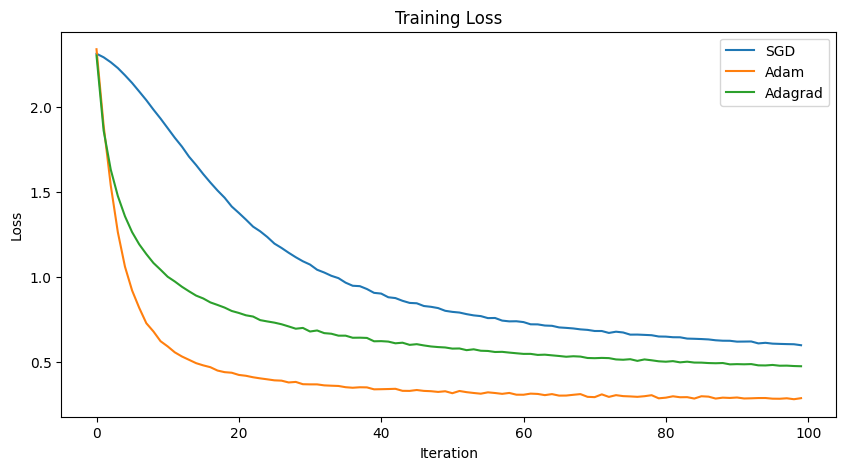

In [19]:
plt.figure(figsize=(10, 5))
for name, losses in training_losses.items():
    plt.plot(losses, label=name)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()